# **TP2 Régression linéaire et descente de gradient**

Ressource : Understanding Deep Learning, https://udlbook.github.io/udlbook/

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import pandas as pd


/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Créer les données d'entrainement, chaque donnée est représentée par une valeur x_i et une sortie y_i

#data = np.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
#                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

dataF = pd.read_csv('./data1.csv', header=None, names=['x', 'y'])
dataF

,x,y
0,0.03,0.67
1,0.19,0.85
2,0.34,1.05
3,0.46,1.00
4,0.78,1.40
5,0.81,1.50
6,1.08,1.30
7,1.18,1.54
8,1.39,1.55
9,1.60,1.68


In [3]:
data = np.array(dataF.values).transpose()
print(data)


[[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
 [0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]]


Visualisons les données

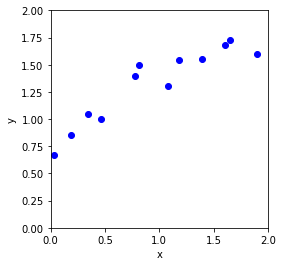

In [4]:
def draw_data(data):
  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.set_xlim([0,2]);ax.set_ylim([0,2])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  ax.set_aspect('equal')
  plt.show()

draw_data(data)

# Modèle de régression linéaire
Supposons que la sortie $y$ soit calculée à partir de l'entrée $x=[x_1,\ldots,x_d]$ avec la fonction linéaire
$$ y(x,\omega)\ =\ \omega_0 + \omega_1. x_1 + \ldots +\omega_d.x_d\ =\ 
\omega_0.1 + \omega_1.x_1+\ldots+\omega_d.x_d$$
Ici $\omega_0,\omega_1,\ldots,\omega_d$ sont des paramètres du modèle. Ces paramètres seront représentés par le vecteur $\omega = [\omega_0,\omega_1,\ldots,\omega_d]$.

Dans le cas de l'exemple précédent, où l'entrée $x$ est constituée par une seule valeur $x=[x_1]$ on a
$$ y(x,\omega)\ =\ \omega_0 + \omega_1. x_1\ =\ \omega_0.1 + \omega_1.x_1$$

Afin de simplifier la notation, l'entrée $x$ est étendue avec la valeur 1. On a donc $x=[1,x_1,\ldots,x_d]$. Avec cette convention, la sortie $y$ sera $y=\omega^Tx$.


In [5]:
# Récupération de données X
X=data[0,:]
print(X)
# Ajouter une colonne composée de 1 dans X
X=np.c_[np.ones(X.shape[0]),X]
print(X)
# Récupération de cible
y_hat= data[1,:]
print(y_hat)
# Vérification de la forme de X et y_hat
X.shape, y_hat.shape

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[[1.   0.03]
 [1.   0.19]
 [1.   0.34]
 [1.   0.46]
 [1.   0.78]
 [1.   0.81]
 [1.   1.08]
 [1.   1.18]
 [1.   1.39]
 [1.   1.6 ]
 [1.   1.65]
 [1.   1.9 ]]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


((12, 2), (12,))

In [6]:
# Définir un modèle linéaire 1D
def model(X,omega):
    '''X : données de la forme (N,D), où N le nombre de données
    omega : paramètre de la forme (D, )
    Return :
        y : de la forme (N, ) les prédicition du modèle pour les données
    '''
    
    # TODO :  remplacer le code suivant pour implanter la fonction linéaire
    N = X.shape[0]
    y = np.zeros(N)
    for i in range(N):
        s = 0
        for j in range(len(omega)):
                s += omega[j] * X[i][j]
        y[i] = s
    return y

In [7]:
# Fonction pour afficher les données et le modèle
def draw_model(data,model,omega,title=None):
  x_model = np.arange(0,2,0.01)
  y_model = model(np.c_[np.ones(x_model.shape[0]),x_model], omega)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([0,2]);ax.set_ylim([0,2])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  ax.set_aspect('equal')
  if title is not None:
    ax.set_title(title)
  plt.show()

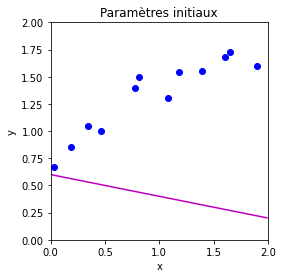

In [8]:
# Initialiser les paramètres
omega = np.array([0.6,-0.2])
# Afficher les données et le modèle
draw_model(data,model,omega,"Paramètres initiaux")

# Calcul de la perte
La fonction de perte entre les résultats du modèle et les sorties attendues est définie par
\begin{equation}
L = \frac{1}{2N}\sum_{i=1}^N (y(x_i,\omega)-\hat{y}_i)^2
\end{equation}
avec $N$ le nombre de données d'observation et $\hat{y}_i$ la sortie attendue de $i$-eme donnée d'observation.

In [9]:
# Function to calculate the loss
def compute_loss(X,y,model,omega):
    ''' X : les données de la forme (N,D)
    y : les cibles de la forme (N, )
    omega : les paramètres de la forme (D, )

    Return : 
        loss la valeur de la perte
    '''
    # TODO remplacer le code suivant pour calculer la perte
    loss = 0
    y_pred = model(X,omega)
    for i in range(len(X)):
        loss += (y_pred[i] - y[i])**2
    return (1/(2*len(X))) * loss

Vérifier si le calcul est correct

In [10]:
# Calculer la perte de notre modèle
loss = compute_loss(X,y_hat,model,omega)
print(f'Valeur de perte = {loss:3.3f}, Résultat correct =0.515')

Valeur de perte = 0.515, Résultat correct =0.515


Chercher à minimiser la perte à la main :  

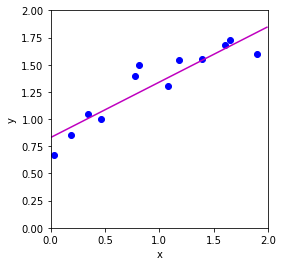

Valeur de perte = 0.01


In [11]:

# TODO : chercher à minimiser la perte à la main
# Changer la valeur des paramètres à la main pour diminuer la perte
# Vous pouvez commencer par garder omega_1 puis essayer de changer omega_0 jusqu'à ce que la perte ne se réduit plus
# puis garder omega_0 et essayer de changer omega_1
# Commencez avec ces valeurs
omega = np.array([0.83,0.51]) 

loss = compute_loss(X,y_hat,model,omega)
draw_model(data,model,omega,"")
print(f'Valeur de perte = {loss:3.2f}')


# Visualisation de la fonction de perte

La procédure précédente est équivalente à la descente de coordonnées pour chercher à minimiser la perte.

Nous allons visualiser la fonction de perte  par une carte de chaleur.


In [12]:
def draw_loss_function(compute_loss, X, y_hat,  model, omega_iters = None):
    # Make a 2D grid of possible w0wand <1 values
    omega0_mesh, omega1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

    # Make a 2D array for the losses
    all_losses = np.zeros_like(omega1_mesh)
    # Run through each 2D combination of phi0, phi1 and compute loss
    for indices,temp in np.ndenumerate(omega1_mesh):
        all_losses[indices] = compute_loss(X,y_hat, model, np.array([omega0_mesh[indices], omega1_mesh[indices]]))
    # Plot the loss function as a heatmap
    fig = plt.figure()
    ax = plt.axes()
    fig.set_size_inches(7,7)
    levels = 256
    ax.contourf(omega0_mesh, omega1_mesh, all_losses ,levels)
    levels = 40
    ax.contour(omega0_mesh, omega1_mesh, all_losses ,levels, colors=['#80808080'])
    ax.set_ylim([1,-1])
    ax.set_xlabel(r'Interception, $\omega_0$')
    ax.set_ylabel(r'Pente, $\omega_1$')
    
    # Plot the position of your best fitting line on the loss function
    # It should be close to the minimum
    #ax.plot(omega[0],omega[1],'ro')
    if omega_iters is not None:
        ax.plot(omega_iters[0,:], omega_iters[1,:],'go-')

    plt.show()

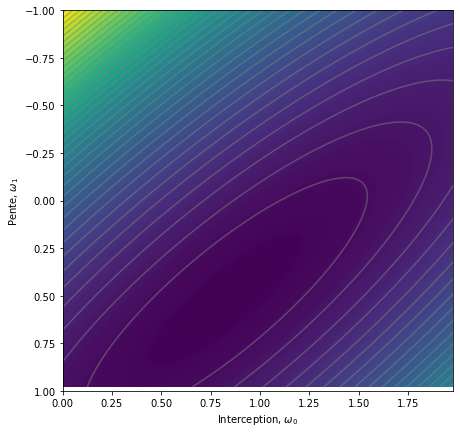

In [13]:
draw_loss_function(compute_loss,X,y_hat,model)

Basé sur cette visualisation, proposer une valeur pour $\omega_0$ et $\omega_1$ afin de minimiser la perte. Quelle est la valeur minimale de la perte que vous trouvez, avec quelle valeur des paramètres ?


# Descente de gradient
Dans cette partie nous allons utiliser l'algorithme de descente de gradient pour trouver la valeur des paramètres afin de minimser la perte.

Calculons le vecteur de gradient pour les paramètres

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\omega} = \begin{bmatrix}\frac{\partial L}{\partial \omega_0} \\\frac{\partial L}{\partial \omega_1} \end{bmatrix}.
\end{equation}

**TO DO** : écrire la dérivée de la fonction de perte $L$ en fonction de $\omega_0$ et $\omega_1$.


In [17]:
def compute_gradient(X, y, omega):
    """X : jeu de données en entrée de la forme (N,D+1)
        N : nombre d'exemples
        D+1 : caractéristique x_0, x_1, ..., x_{D}
    y : cible de la forme (N,)
    omega : paramètres de la forme (D+1,)

    Returns:
    gradient -- les dérivées partielles de la fonction de coût par rapport à w, de la forme (2,)
    """

    N, D = X.shape
    grad = np.zeros(D) 
    
    for j in range(D):
        grandient_sum = 0
        for i in range(N):
            pred = np.dot(X[i],omega)
            loss = pred- y[i]
            grandient_sum += X[i,j]*loss
        grad[j] = grandient_sum/N
    cost = model(X,omega)-y
    grad = np.dot(X.T,cost)/N
    return grad


On peut vérifier si c'est correct en utilisant un astuce. Si on évalue la fonction et change un des paramètres par une très petite différence et normalise par cette différence, on a une approximation du gradient :
\begin{align}
\frac{\partial L}{\partial \omega_{0}}&\approx & \frac{L[\omega_0+\delta, \omega_1]-L[\omega_0, \omega_1]}{\delta}\\
\frac{\partial L}{\partial \omega_{1}}&\approx & \frac{L[\omega_0, \omega_1+\delta]-L[\omega_0, \omega_1]}{\delta}
\end{align}

On ne fait pas cela avec un grand nombre de paramètres car cela devient très coûteux.


In [18]:
# Compute the gradient using your function
gradient = compute_gradient(X,y_hat, omega)
grad_omega0 = gradient[0]
grad_omega1 = gradient[1]
print("Vos gradients: (%3.3f,%3.3f)"%(grad_omega0,grad_omega1))
# Approximate the gradients with finite differences
delta = 0.0001
loss = compute_loss(X,y_hat,model,omega)
dl_domega0_est = (compute_loss(X,y_hat,model,omega+np.array([delta,0])) - loss)/delta
dl_domega1_est = (compute_loss(X,y_hat,model,omega+np.array([0,delta])) - loss)/delta
print("Approx gradients: (%3.3f,%3.3f)"%(dl_domega0_est,dl_domega1_est))
# There might be small differences in the last significant figure because finite gradients is an approximation


Vos gradients: (-0.008,-0.011)
Approx gradients: (-0.008,-0.011)


La fonction suivante va réaliser une étape de la descente de gradient.

In [16]:
def gradient_descent(X, Y_hat, model, omega_init, eta, iters):
    ''' X : jeu de données en entrée de forme (N, D)
    Y_hat : cible de forme (N, )
    omega : paramètres de forme (D, )
    model : fonction de regression linéaire
    eta : taux d'apprentissage.
    iters : nombre d'itérations.

    Return:
    omega_all -- la liste des valeurs de paramètres de toutes les itérations, de la forme (2,iters+1), 
    telle que omega_all[:,i] = valeus de paramètres omega à l'itération i 
    '''
    omega_all = np.zeros((2,iters+1))
    omega_all[0,0] = omega_init[0]
    omega_all[1,0] = omega_init[1]

    # calculer la perte initiale
    loss = ...
    # visualiser le premier model
    draw_model(data, model, omega_all[:,0:1], "Initial parameters, Loss = %f, w_0 = %f, w_1 = %f"%(i+1,loss,omega_init[0],omega_init[1])

    omega = omega_init
    # Répéter les itérations
    for i in range(iters):
        # calculer le gradient 
        gradient = ...
        # mettre à jour omega en utilisant le gradient et le taux d'apprentissage eta
        omega = ...
        # calculer la perte
        loss = ...
        # ajouter la nouvelle valeur de omega dans omega_all
        omega_all[0,i+1] = omega[0]
        omega_all[1,i+1] = omega[1]
        # visualiser le nouveau model
        draw_model(data,model,omega,"Iteration %d, loss = %f, w_0 = %f, w_1 = %f"%(i+1,loss,omega[0],omega[1]))
    return omega_all


SyntaxError: '(' was never closed (245904152.py, line 20)

In [ ]:
omega_init=np.array([1.6,-0.5])
eta= 0.85
iters = 15

omega_all = gradient_descent(X,Y_hat,model,omega_init,eta,iters)
draw_loss_function(compute_loss, X,Y_hat, model,omega_all)


Analyser l'impact des éléments suivants, en changeant leur valeur et en observant le fonctionnement :

*   la valeur initiale de $\omega_0$ et $\omega_1$
*   la valeur de $\eta$
* le nombre d'itérations

